understanding the modularity metric in networks

In [4]:
import networkx as nx
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = [2, 2]

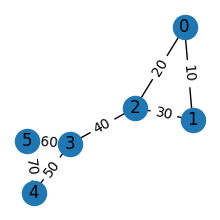

In [28]:
G = nx.barbell_graph(3, 0)
G.add_weighted_edges_from([(u, v, 10 * (index + 1)) for index, (u, v) in enumerate(G.edges())])
pos = pos = nx.spring_layout(G)
nx.draw(G, pos=pos, with_labels=True)
edge_labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=edge_labels)
plt.show()

In [29]:
# says we have found the communities
communities = [{0, 1, 2}, {3, 4, 5}]

In [30]:
true_modularity = nx.community.modularity(G, communities)
true_modularity

0.2653061224489796

try to calculate the modularity by my self, for understanding purpose.
$$Q=\sum_{c=1}^n \left[ \frac {L_c} m - \gamma \left( \frac {k_c}{2m} \right)^2 \right]$$

where:
- the sum is iterates over all communities $c$
- $L_c$ is the number of intra-community links for community $c$
- $k_c$ is the sum of degress of nodes in community $c$
- $\gamma$ is the resolution parameter. If resolution is less than 1, modularity favors larger communities. Greater than 1 favors smaller communities.


In [48]:
m = G.size(weight="weight")
degrees = G.degree(weight="weight")
print(m)
degrees

280.0


DegreeView({0: 30, 1: 40, 2: 90, 3: 150, 4: 120, 5: 130})

3


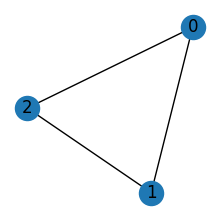

In [41]:
print(G.subgraph(communities[0]).size())
nx.draw(G.subgraph(communities[0]), with_labels=True)

In [52]:
# find number of intra-community edges for each community
Q = 0
gamma = 1
for community in communities:
    subgraph = G.subgraph(community)
    Lc = subgraph.size(weight="weight")
    Kc = 0
    for node in subgraph.nodes():
        Kc += degrees[node]
    Q += Lc / m - gamma * (Kc / (2 * m)) ** 2
print(Q)
print(Q == true_modularity)

0.2653061224489796
True
